In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import numpy.polynomial.polynomial as poly
%matplotlib inline

In [3]:
fn_src = 'https://www.dropbox.com/sh/n4924ipcfjqc0t6/AADOv9JYMUBK1tlg9P71gSSra/example_data_s1.pickle?dl=1'
fn_dst = 'example_data_s1.pickle'

import os
from six.moves import urllib

if os.path.isfile(fn_dst):
    print('File %s is already downloaded' % fn_dst)
else:        
    urllib.request.urlretrieve(fn_src, fn_dst)

In [4]:
with open('example_data_s1.pickle', 'rb') as fp:
    X,y = pickle.load(fp)

In [5]:
tsamp = 0.05
print(X)

nt = print('Total number of time bins=',X.shape[0])
nneuron = print('The total number of neurons=',X.shape[1])
nout = print('The total number of output variables to track=',y.shape[1])
ttotal = print('Total time of the experiment in seconds=',X.shape[0]*tsamp)

[[0. 0. 0. ... 0. 0. 1.]
 [0. 0. 1. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
Total number of time bins= 61339
The total number of neurons= 52
The total number of output variables to track= 2
Total time of the experiment in seconds= 3066.9500000000003


In [6]:
from sklearn.model_selection import train_test_split
Xtr, Xts, ytr, yts= train_test_split(X, y, test_size=0.33)

In [7]:
regr = LinearRegression()
regr.fit(Xtr,ytr)
regr.coef_
yhat = regr.predict(Xts)
rsq= r2_score(yts, yhat)
print(rsq)

0.4640963292521515


Text(0, 0.5, 'yts[:,0]')

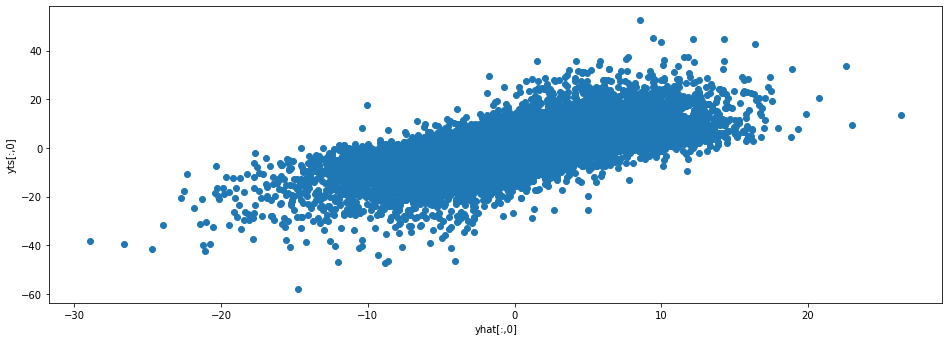

In [10]:
plt.figure(figsize=(16,12))
plt.subplot(211)
plt.scatter(yhat[:,0],yts[:,0])
plt.xlabel('yhat[:,0]')
plt.ylabel('yts[:,0]')

Text(0, 0.5, 'yts[:,1]')

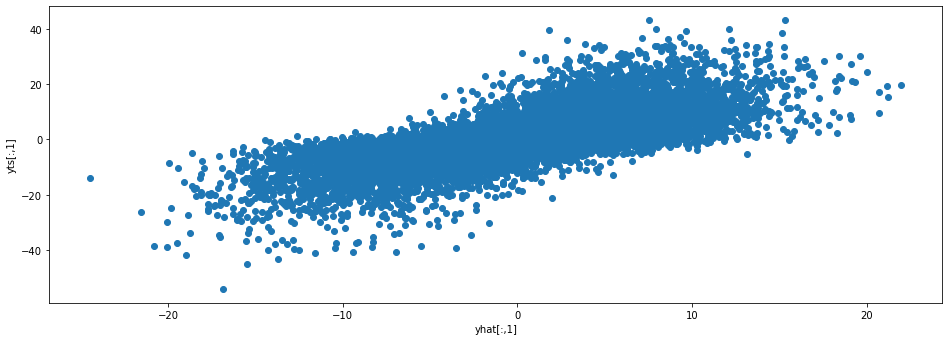

In [9]:
plt.figure(figsize=(16,12))
plt.subplot(212)
plt.scatter(yhat[:,1],yts[:,1])
plt.xlabel('yhat[:,1]')
plt.ylabel('yts[:,1]')

In [12]:
def create_dly_data(X,y,dly):
    n, p = X.shape
    Xdly = np.zeros((n-dly, (dly+1)*p))
    ydly = np.zeros((y.shape[0]-dly, y.shape[1]))
    for i in range(0, n-dly):
        Xdly[i,:] = (np.reshape(X[i:i+dly+1,:], (dly+1)*p))
        ydly[i,:] = y[i+dly,:]
    return Xdly, ydly

In [13]:
Xdly,ydly=create_dly_data(X,y,6)
Xdtr, Xdts, ydtr, ydts= train_test_split(Xdly, ydly, test_size=0.33)
regr = LinearRegression()
regr.fit(Xdtr,ydtr)
yd_hat = regr.predict(Xdts)
rsq2= r2_score(ydts, yd_hat)
print(rsq2)

0.6904032954506689


Text(0.5, 0, 'yts[1]')

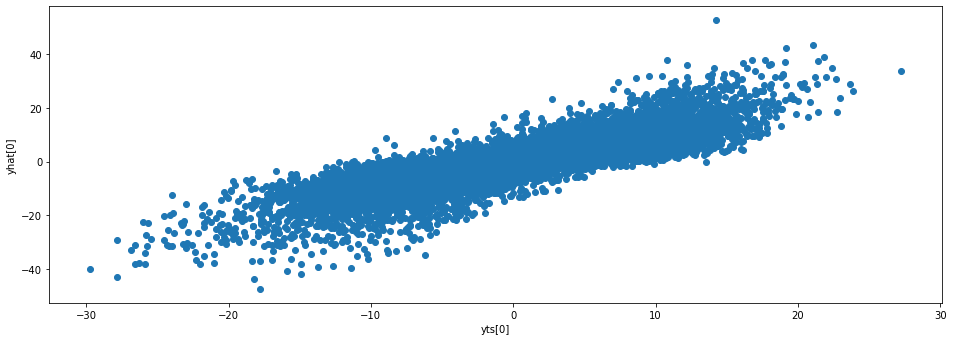

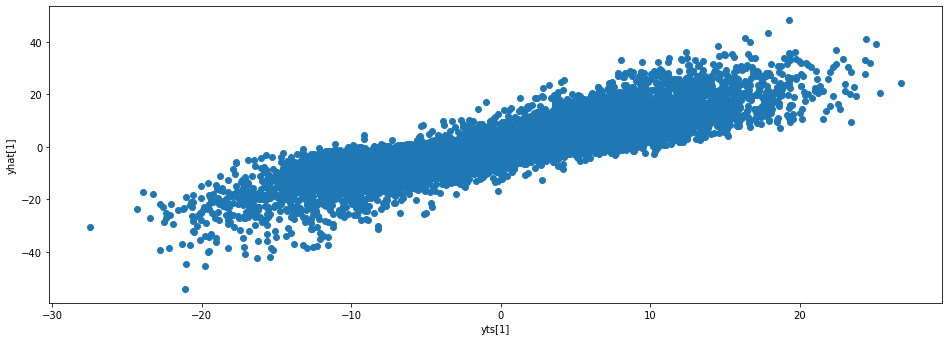

In [17]:
plt.figure(figsize=(16,12))
plt.subplot(211)
plt.scatter(yd_hat[:, 0], ydts[:, 0])
plt.ylabel('yhat[0]')
plt.xlabel('yts[0]')

plt.figure(figsize=(16,12))
plt.subplot(212)
plt.scatter(yd_hat[:, 1], ydts[:, 1])
plt.ylabel('yhat[1]')
plt.xlabel('yts[1]')

In [18]:
nred = 6000
Xred = X[:nred,:]
yred = y[:nred,:]

In [19]:
dmax = 15
Xdly, ydly = create_dly_data(X, y, dly=dmax)

In [ ]:
import  sklearn.model_selection 

nfold = 5
kf = sklearn.model_selection.KFold(n_splits=nfold)
d_test=np.arange(dmax + 1)
nd = len(d_test)
Rsq = np.zeros((nfold, dmax + 1))

for isplit, Ind in enumerate(kf.split(Xdly)):
    print("fold = %d " % isplit)
    Itr, Its = Ind        
    
    for it, d in enumerate(d_test):
        X_dl = Xdly[:,:(d+1)*X.shape[1]]
        Xd_ytr, Xd_yts, yd_ytr, yd_yts = train_test_split(X_dl, ydly, test_size=0.33)
        regr = LinearRegression()
        regr.fit(Xd_ytr, yd_ytr)
        yd_yhat = regr.predict(Xd_yts)
        rd_ysq = r2_score(yd_yts, yd_yhat)
        Rsq[isplit, d] = rd_ysq

fold = 0 


In [ ]:
Rsqstd = np.std(Rsq, axis=0)
Rsq_mean = np.mean(Rsq,axis=0)
plt.figure()
plt.errorbar(d_test,Rsq_mean,yerr=Rsqstd,capsize=10)

plt.ylabel('Fit Measure (Coefficient of Determination)')
plt.xlabel('Model Order in terms of Memory')
plt.grid()

In [ ]:
print('Optimal Order corresponding to highest R^2 = 15')

In [ ]:
print('Optimal Order corresponding to 1SE rule = 15')